In [6]:
import os,sys
import h5py
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from tqdm import tqdm
from PIL import Image

## Let's discover the different labels 

In [7]:
data_root='.'
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.label.nunique(),'labels')
label_counts=train.label.value_counts()
print(label_counts)

2 labels
ADC    3757
SCC    3757
Name: label, dtype: int64


## Let's see the distribution of each class in the dataset

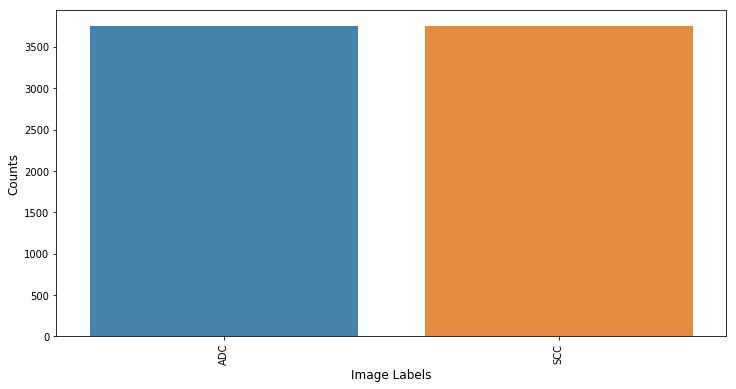

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Put each training image into a sub folder corresponding to its label after converting to JPG format

In [9]:
for img in tqdm(train.values):
    filename=img[0]
    label=img[1]
    src=os.path.join(data_root,'train_img',filename+'.jpg')
    label_dir=os.path.join(data_root,'train',label)
    dest=os.path.join(label_dir,filename+'.jpg')
    im=Image.open(src)
    rgb_im=im.convert('RGB')
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)
    rgb_im.save(dest)  
    if not os.path.exists(os.path.join(data_root,'train2',label)):
        os.makedirs(os.path.join(data_root,'train2',label))
    rgb_im.save(os.path.join(data_root,'train2',label,filename+'.jpg'))

100%|██████████████████████████████████████████████████████████████████████████████| 7514/7514 [09:34<00:00, 13.07it/s]


## Some agile data augmentation (to prevent overfitting) + class balance

In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

class_size=600

src_train_dir=os.path.join(data_root,'train')
dest_train_dir=os.path.join(data_root,'train2')
it=0
for count in label_counts.values:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,label_counts.index[it])
    src_lab_dir=os.path.join(src_train_dir,label_counts.index[it])
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

3757 0
3757 0


## Let's check the new distribution

In [6]:
 for dirpath, dirnames, filenames in os.walk(train_dir):
    i=0
    label=''
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        label=os.path.split(dirpath)[1]
        i+=1
    print(label,i)
        

NameError: name 'train_dir' is not defined